# **SVM - Kernel comparison**

## Kernel interpretation

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from PIL import Image
from sklearn import svm
from sklearn.datasets import make_gaussian_quantiles

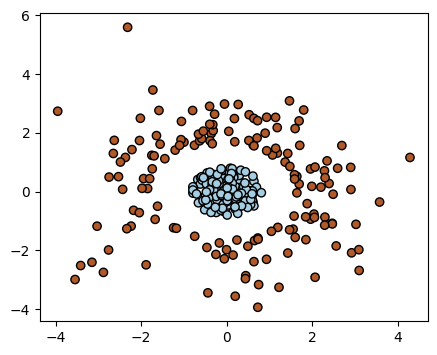

In [47]:
X, y = make_gaussian_quantiles(cov=2,
                                 n_samples = 300, n_features = 2,
                                 n_classes = 2, random_state = 1)

X[y==0, :] = X[y==0, :] * 0.5
_, ax = plt.subplots(figsize=(5,4))
ax.scatter( X[:,0], X[:,1], c = y, edgecolors='k', cmap='Paired')

In [38]:
k = X[:,0]*2 + X[:,1]*2
# X = np.c_[X,k]
print(X.shape)

(300, 3)


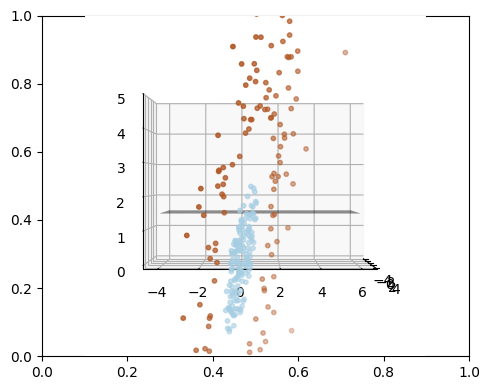

In [39]:
f, _ = plt.subplots(figsize=(5,4))
ax = f.add_subplot(projection='3d')

ax.view_init(0, 0)
ax.scatter3D( X[:,0], X[:,1], k, c = y, s=10, cmap='Paired')

h_grid, v_grid = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 6, 100))
z_grid = np.ones(h_grid.shape) * 1.5

ax.plot_surface(h_grid, v_grid, z_grid, color='k', alpha=0.5)
ax.set_zlim(-0.1, 5)
plt.tight_layout()

In [36]:
import os
from PIL import Image

In [29]:
os.makedirs('images', exist_ok=True)

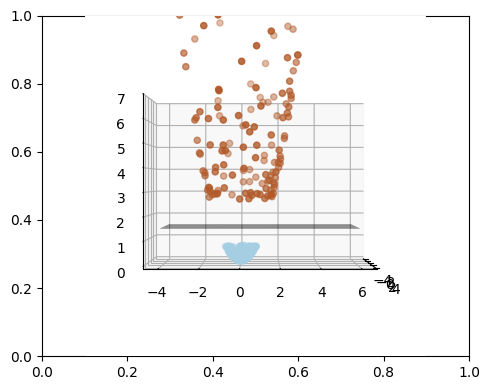

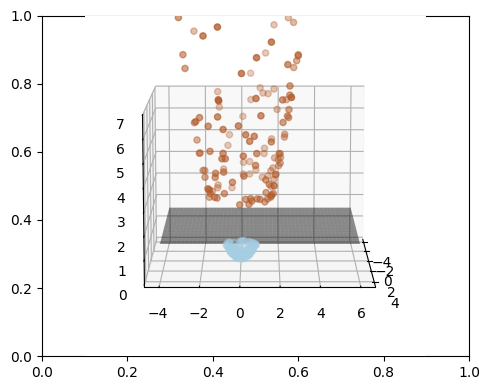

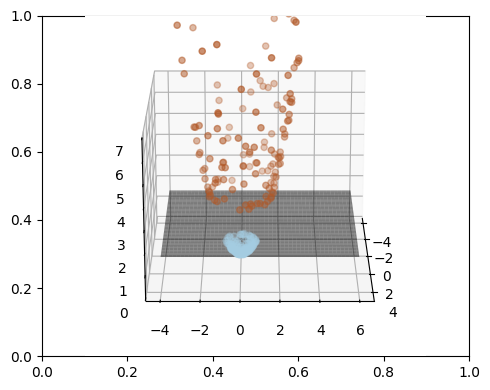

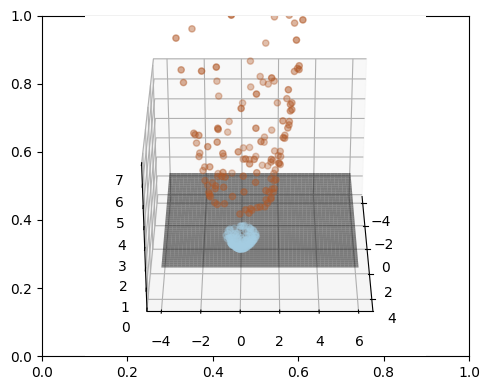

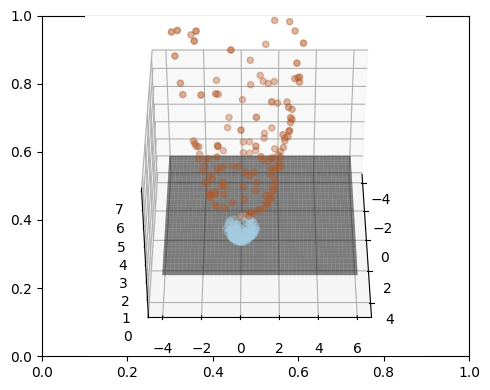

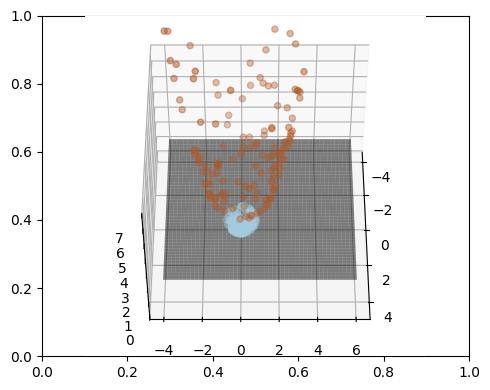

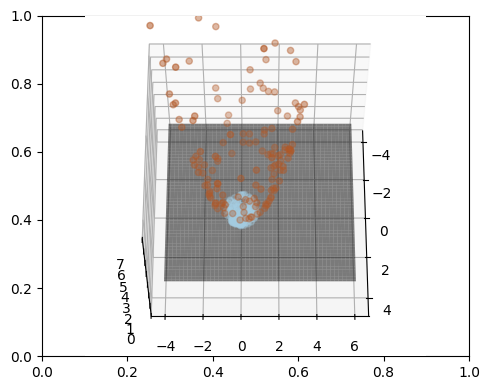

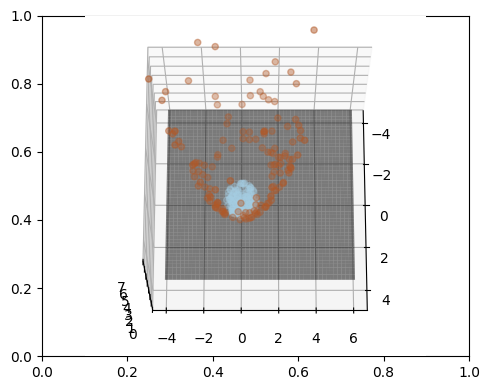

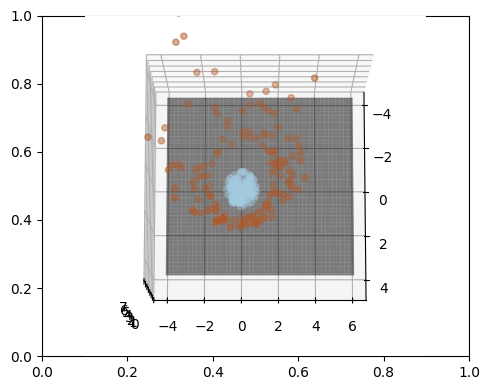

In [32]:
for i in range(0, 90, 10):
  f, _ = plt.subplots(figsize=(5,4))
  ax = f.add_subplot(projection='3d')
  ax.view_init(i,0)
  ax.scatter3D(X[:,0], X[:,1], k, c=y, cmap='Paired')
  ax.plot_surface(h_grid, v_grid, z_grid, alpha=0.5, color='k')
  ax.set_zlim(-0.1, 7)
  plt.tight_layout()
  plt.savefig('images/{0}.png'.format(i))

In [40]:
print(sorted(os.listdir('images/')))

['.ipynb_checkpoints', '0.png', '10.png', '20.png', '30.png', '40.png', '50.png', '60.png', '70.png', '80.png']


In [37]:
all_images = []
# print(os.listdir('images/'))
# print(sorted(os.listdir('images/')))

for file_ in sorted(os.listdir('images/')):
    image = Image.open('images/{0}'.format(file_))
    all_images.append(image)

image.save("kernel_.gif", save_all=True, append_images=all_images, duration=200, loop=0)

IsADirectoryError: [Errno 21] Is a directory: 'images/.ipynb_checkpoints'

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## SVM

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_classification

In [ ]:
# we create 100 separable points
X, Y = make_classification(n_samples = _ , n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=2, random_state=2)
plt.scatter( _ , _ , c = _ , s = _, cmap=plt.cm.Paired)

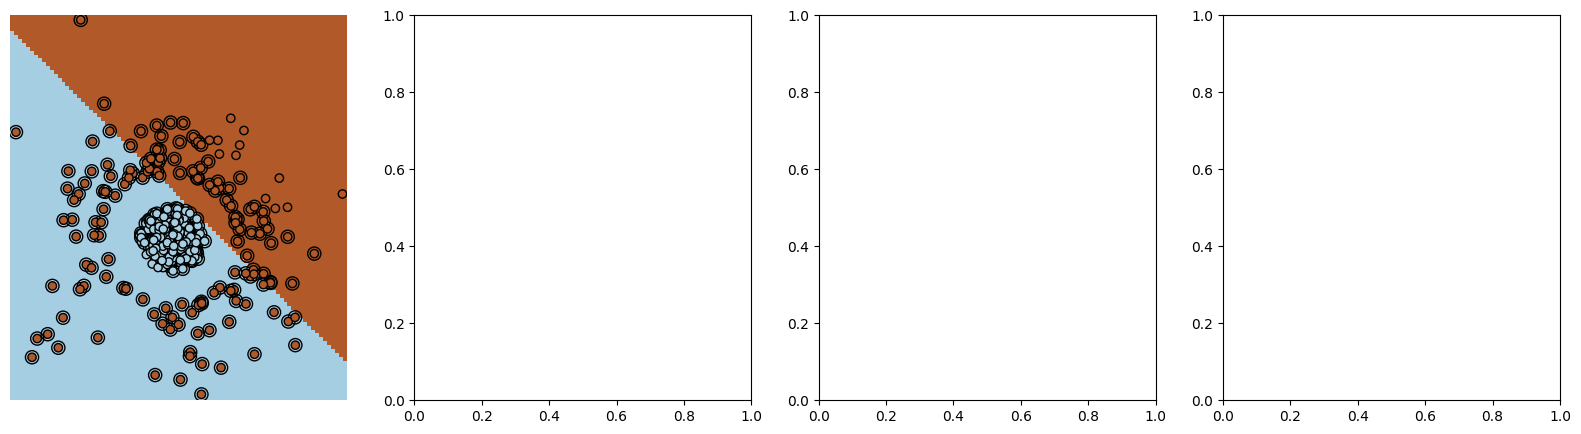

In [49]:

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

_, axes = plt.subplots(1,4, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels) :
    #
    clf = svm.SVC(kernel = kernel, gamma = 1)
    clf.fit( X, y)

    h_min, h_max = X[:,0].min() - 0.1, X[:,0].max() + 0.1
    v_min, v_max = X[:,1].min() - 0.1, X[:,1].max() + 0.1

    h_grid, v_grid = np.meshgrid(np.arange( h_min, h_max, 0.1), np.arange( v_min, v_max, 0.1))
    pred_grid = clf.predict(np.c_[h_grid.ravel(), v_grid.ravel()])

    pred_grid = pred_grid.reshape(h_grid.shape)
    axes[i].pcolormesh( h_grid, v_grid, pred_grid, cmap = 'Paired')
    # axes[i].contour( _ , _ , predictions, colors=['k', 'k'], linestyles=['-', '-'], levels=[0, 1])

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter(X[:,0], X[:,1], c = y, cmap='Paired', edgecolors='k')
    axes[i].set_axis_off()

    plt.show()

In [ ]:

kernels = ['linear', 'poly', 'rbf']

_, axes = plt.subplots(1,3, figsize = (20,5))

# fit the model
for i, kernel in enumerate(kernels):
    #
    clf = svm.SVC(kernel = _ , gamma = 1)
    clf.fit( _ , _ )

    x_min, x_max = _ , _
    y_min, y_max = _ , _

    x_dim, y_dim = np.meshgrid(np.arange( _ , _ , 0.01), np.arange( _ , _ , 0.01))
    predictions = clf.decision_function(np.c_[x_dim.ravel(), y_dim.ravel()])

    predictions = predictions.reshape(x_dim.shape)
    axes[i].pcolormesh( _ , _ , predictions, cmap = plt.cm.coolwarm)
    axes[i].contourf( _ , _ , predictions, alpha = 0.75, cmap = plt.cm.coolwarm)

    axes[i].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s = 90, facecolors = 'none', edgecolors = 'k')

    axes[i].scatter( _ , _ , c=Y, cmap=plt.cm.coolwarm, edgecolors='k')
    axes[i].set_axis_off()

plt.show()

Create a function that plots the decision boundaries of a given SVM

## In real data

Evaluate the different SVM kernels in the Iris and Fruits datasets